 <h1 align = center>HOMEWORK: OOP Calculation of Rental Income - Bigger Pockets Four SQ Method </h1>

In [1]:
#class for creating a Property object
from IPython.display import Image
import requests
import json

class Property():
    
    def __init__(self):
        #property info
        self.state = None
        self.city = None
        self.zipcode = None
        self.address = None
        self.units = None

        
        #property expenses
        self.tax = None
        self.insurance = None
        self.vacancy = None
        self.repairs = None
        self.capital_expenditures = None
        self.management_fee = None
        self.mortgage = None
        self.misc_expenses = None
        self.total_expenses = None
        
        #property income
        self.rent = None
        self.total_rent = None
        self.laundry = None
        self.storage = None
        self.misc_income = None
        self.total_income = None
        
        #initial investments
        self.down_payment = None
        self.closing_costs = None
        self.rehab_budget = None
        self.misc_investment = None
        self.total_investments = None
        
        #ROI
        self.roi = None
        
    def set_property_info(self):
        self.address = input("what is the street number and name of the property address? ")
        self.state = input("Which state (spelled out) is the property located in? ").title()
        self.city = input("Which city? ")
        self.zipcode = input("What is the property's zip code? ")
        self.units = int(input("How many units are there? "))
              
        
    
    def set_property_expenses(self):
        self.tax = int(input("What are the taxes per year? "))
        self.insurance = int(input("What is the insurance cost per year? "))
        while True:
            self.vacancy = int(input("What percentage of the time do expect the unit(s) to be vacant? "))
            if not (self.vacancy >=0 and self.vacancy<=100):
                print("Please enter a percentage value between 0 and 100. ")
            else:
                break
        self.repairs = int(input("How much are the repairs per month?"))
        self.capital_expenditures = int(input("How much will you set aside for annual, capital expenditures? "))
        self.management_fee = int(input("What is the management fee per month "))
        self.mortgage = int(input("If the property is financed, what are the monthly loan costs? Enter 0 if it's not financed. "))
        self.misc_expenses = int(input("Enter an amount for other expenses.  Enter 0 if there are not other expenses. "))
        self.total_expenses = (int(self.tax/12) + int(self.insurance/12) + int((self.vacancy/100)*self.total_rent)+self.repairs
                              + int(self.capital_expenditures/12) + self.management_fee + self.mortgage + self.misc_expenses)
#         print(self.tax)
#         print(self.insurance)
#         print(self.vacancy)
#         print(self.total_rent)
#         print(self.repairs)
#         print(self.capital_expenditures)
#         print(self.management_fee)
#         print(self.mortgage)
#         print(self.misc_expenses)
           
    def set_property_income(self):
        with open("data.json") as bob:
            data=json.load(bob)
        # print(data[0])
        for i in range(len(data)):
            if data[i]["state"] == self.state:
                rent = int(data[i]["averageRentZillow"])
        while True:
            yes_no = input(f"""The average monthly rent according to Zillow in {self.state} is {rent}. 
                Do you accept {rent} as your anticipated rent? Y/N """)
            if yes_no.lower() == 'y':
                self.rent = rent
                break
            elif yes_no.lower() == 'n':
                self.rent = int(input("Please enter the rent you want to use - in whole, US Dollars."))
                break        
        self.total_rent = self.rent*self.units
        self.laundry = int(input("How much is the monthly laundry revenue? "))
        self.storage = int(input("How much is collected monthly for storage fees? "))
        self.misc_income = int(input("Enter the monthly amount for other legal income, or enter 0 if none. "))
        self.total_income = self.total_rent + self.laundry + self.storage + self.misc_income
        
#         print(self.total_rent)
#         print(self.laundry)
#         print(self.storage)
#         print(self.misc_income)
#         print(self.total_income)        
        
        
    def set_initial_investment(self):
        self.down_payment = int(input("How much money do you have for a down payment? This is the purchase price if the propery is not financed. "))
        self.closing_costs = int(input("What are your closing costs on the purchase? "))
        self.rehab_budget = int(input("What amount do you expect to spend rehabbing the property prior to putting it up for rent? "))
        self.misc_investments = int(input("Are there other costs that should be added to the initial investment amount? Enter 0 if None. "))
        self.total_investments = (self.down_payment + self.closing_costs + self.rehab_budget
                                 + self.misc_investments)
#         print(self.down_payment)
#         print(self.closing_costs)
#         print(self.rehab_budget)
#         print(self.misc_investments)
#         print(self.total_investments)
            
    def set_ROI(self):
        self.roi = round((((float(self.total_income) - float(self.total_expenses))*12)/float(self.total_investments))*100,2)

                
    
    def __repr__(self):
#         print(self.total_income)
#         print(self.total_expenses)
#         print(self.total_investments)
#         print(self.roi)
        return f" {self.address} | {self.city}, {self.state} - ROI {self.roi}%"
                
                    
                    
                    

In [2]:
class User:
    id_counter = 1
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.id_counter
        User.id_counter += 1
        self.property_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]
    


In [3]:

generic_image = 'bigger-pockets.png'

# Create a Inv_Firm Class for Each Investment Business - multiple users with each their portfolio of properties
class Inv_Firm():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # add a user
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print("User with that name already exists. Please try again!")
        else:
            password = input("Please enter your password. ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
            
    #choose a user
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")

        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in")
                break
        else:
            print("Username and/or password is incorrect")

    def update_user(self):
        
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username")
            if new_user.lower() != 'skip':
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password")
            if new_pw.lower() != 'skip':
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated")
            
        else:
            print('Please login to update user.')
            self.login_user()
         
            
    def logout(self):
        self.current_user = None
        print("You have succesfully been logged out!")
        
    
    #add property
    def add_property(self):
        if self.current_user:
            property = Property()
            property.set_property_info()
            property.set_property_income()
            property.set_property_expenses()            
            property.set_initial_investment()
            property.set_ROI()
            self.current_user.property_list.append(property)
        
            print(f"""\nThe property located at {property.address} in {property.city}, {property.state}
            has been added to your property Portfolio! """)    
        else:
            print('Please login to add a property.')


    #edit property variables
#     def edit_property(self):
#         self.view_watch_list()
        
#         watch = input("What would you like to watch? ")
# #         if watch.lower() in list(map(lambda x: x.title.lower(), self.current_user.watch_list)):
#         for series in self.current_user.watch_list:
#             if series.title.lower() == watch.lower().strip():
#                 print("..................")
#                 sleep(2)
#                 print("..................")
#                 series.watch()
        
#         else:
#             response = input(f"{watch} is not in your watchlist...would you like to add it y/n>")
#             if response in ('yes', 'y'):
#                 self.add_to_watchlist(watch)                
#                 print("..................")
#                 sleep(2)
#                 print("..................")
#                 self.current_user.watch_list[-1].watch()    
            
        
    #view investment properties list
    def view_properties_list(self):
        if self.current_user:
            if self.current_user.property_list == []:
                print("You have no properties in your Portfolio! ")
            else:
                index = 0
                for prop in self.current_user.property_list:
                    print(f"\n\n[{index}]-{prop}\n")
                    index += 1
        else:
            print('Please login to view your properties.')


            
    #delete property from properties list       
    def delete_property(self):


        if self.current_user:
            print("Your current properties: ")
            self.view_properties_list()

            response = int(input("Which property would you like to remove from your portfolio? Enter the [#] "))
            while True:
                if response in range(len(self.current_user.property_list)):
                    removed_property = self.current_user.property_list.pop(response)
                    print(f"\n{removed_property} has been removed.\n")
                    break
                else:
                    "Invalid selection. Please try again."
        else:
            print('Please login to delete a property.')
                 
        self.view_properties_list()
        

            
    # run function that gives us that sweet, sweet sauce...or spicy if that's your preference or both
    def run(self):
        """
        - Method that allows users to create a username and login.
        - Users then can add a property to their list along with property info, expenses, income and initial investment
            amounts.
        - After adding a property or properties, the user can view their list which will display the ROI next to each 
            property address and image.
        """
        display(Image(generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
        
        
        while True:
            print("""
            Options (enter the number next to your choice):
            [1] Add - add a new user profile
            [2] Login - login to your profile
            [3] Update - update your user profile   
            [4] Logout - logout of your profile                     
            [5] Add Property - add a property to your portfolio
            [6] View - view your portfolio
            [7] Delete - delete a property
            [8] Quit - close the application
            
            """)
            response = input("What would you like to do?")
            
            if response == '1':
                self.add_user()
            elif response == '2':
                self.login_user()
            elif response == '3':
                self.update_user()
            elif response == '4':
                self.logout()                   
            elif response == '5':
                self.add_property()
#             elif response == '6':
#                 self.edit_property()
            elif response == '6':
                self.view_properties_list()
            elif response == '7':
                self.delete_property()
            elif response == '8':
                print(f"""Thanks for trusting us with your investments, {self.current_user}! Have a nice day!
                Stay tuned for our new vacuum cleaner products - including the revolutionary haircut machine, Suck Cut.""")
                break                
            else:
                print("Invalid Input: please choose from the list!")

        

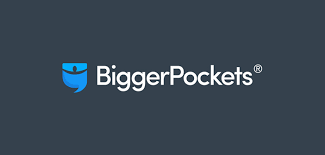

Please enter a username: jimmy
Please enter your password. abc123

        1 - Jimmy
        pw: 31b
         has been created!!!
What is your username? jimmy
What is your password? abc123

        1 - Jimmy
        pw: 31b
         has logged in

            Options (enter the number next to your choice):
            [1] Add - add a new user profile
            [2] Login - login to your profile
            [3] Update - update your user profile   
            [4] Logout - logout of your profile                     
            [5] Add Property - add a property to your portfolio
            [6] View - view your portfolio
            [7] Delete - delete a property
            [8] Quit - close the application
            
            
What would you like to do?5
what is the street number and name of the property address? 123 E Elm St
Which state (spelled out) is the property located in? Texas
Which city? Plano
What is the property's zip code? 75025
How many units are there? 2
The average 

In [4]:
bigger_pockets = Inv_Firm()
bigger_pockets.run()